In [26]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, shapiro, levene, pearsonr
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
# Load Dataset
data = pd.read_excel('/content/Strikers_performance.xlsx')
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


In [28]:
# Missing Values
data.isnull().sum()

,0
Striker_ID,0
Nationality,0
Footedness,0
Marital Status,0
Goals Scored,0
Assists,0
Shots on Target,0
Shot Accuracy,0
Conversion Rate,0
Dribbling Success,0


In [29]:
# Data Cleaning
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
data[['Movement off the Ball',
      'Big Game Performance',
      'Penalty Success Rate']] = imputer.fit_transform(data[['Movement off the Ball',
                                                             'Big Game Performance',
                                                             'Penalty Success Rate']])
data.isnull().sum()

,0
Striker_ID,0
Nationality,0
Footedness,0
Marital Status,0
Goals Scored,0
Assists,0
Shots on Target,0
Shot Accuracy,0
Conversion Rate,0
Dribbling Success,0


In [30]:
# Data Types
data.dtypes

,0
Striker_ID,int64
Nationality,object
Footedness,object
Marital Status,object
Goals Scored,float64
Assists,float64
Shots on Target,float64
Shot Accuracy,float64
Conversion Rate,float64
Dribbling Success,float64


In [31]:
variables = ['Goals Scored', 'Assists',
             'Shots on Target',
             'Movement off the Ball',
             'Hold-up Play',
             'Aerial Duels Won',
             'Defensive Contribution',
             'Big Game Performance',
             'Impact on Team Performance',
             'Off-field Conduct']

for var in variables:
    data[var] = data[var].astype('int')

data.dtypes

,0
Striker_ID,int64
Nationality,object
Footedness,object
Marital Status,object
Goals Scored,int64
Assists,int64
Shots on Target,int64
Shot Accuracy,float64
Conversion Rate,float64
Dribbling Success,float64


In [32]:
# Exploratory Data Analysis

# Perform descriptive analysis
round(data.describe(), 2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


In [33]:
# Perform percentage analysis
freq_Footedness = data['Footedness'].value_counts()
perc_Footedness = freq_Footedness/len(data['Footedness'])*100
perc_Footedness

,count
Footedness,
Right-footed,53.4
Left-footed,46.6


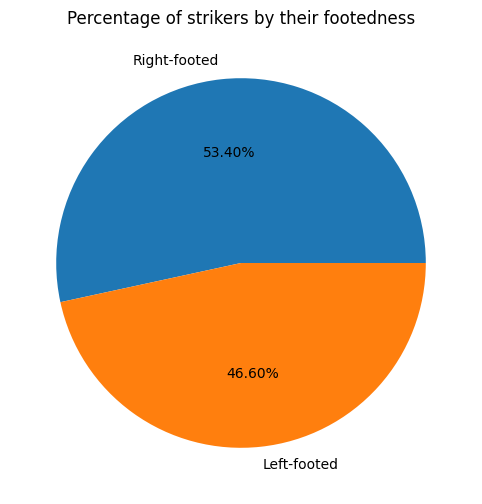

In [34]:
plt.figure(figsize=(12, 6))
perc_Footedness.plot(kind='pie', autopct='%1.2f%%')
plt.title('Percentage of strikers by their footedness')
plt.ylabel('')
plt.show()

In [36]:
# Average number of goals scored
goals = data.groupby('Nationality')['Goals Scored'].mean().sort_values(ascending=False)
round(goals)

,Goals Scored
Nationality,
Brazil,15.0
Spain,15.0
France,14.0
Germany,14.0
England,14.0


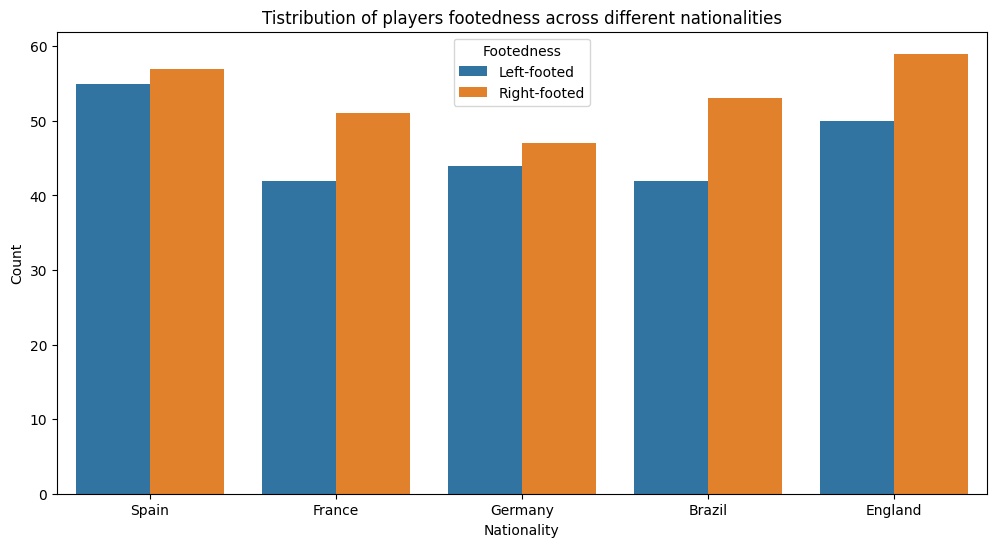

In [37]:
# Average conversion rate for players based on their footedness
footedness_by_nationality = pd.crosstab(data['Nationality'], data['Footedness'])
footedness_by_nationality
plt.figure(figsize=(12, 6))
sns.countplot(x='Nationality', hue='Footedness', data=data)
plt.title('Tistribution of players footedness across different nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

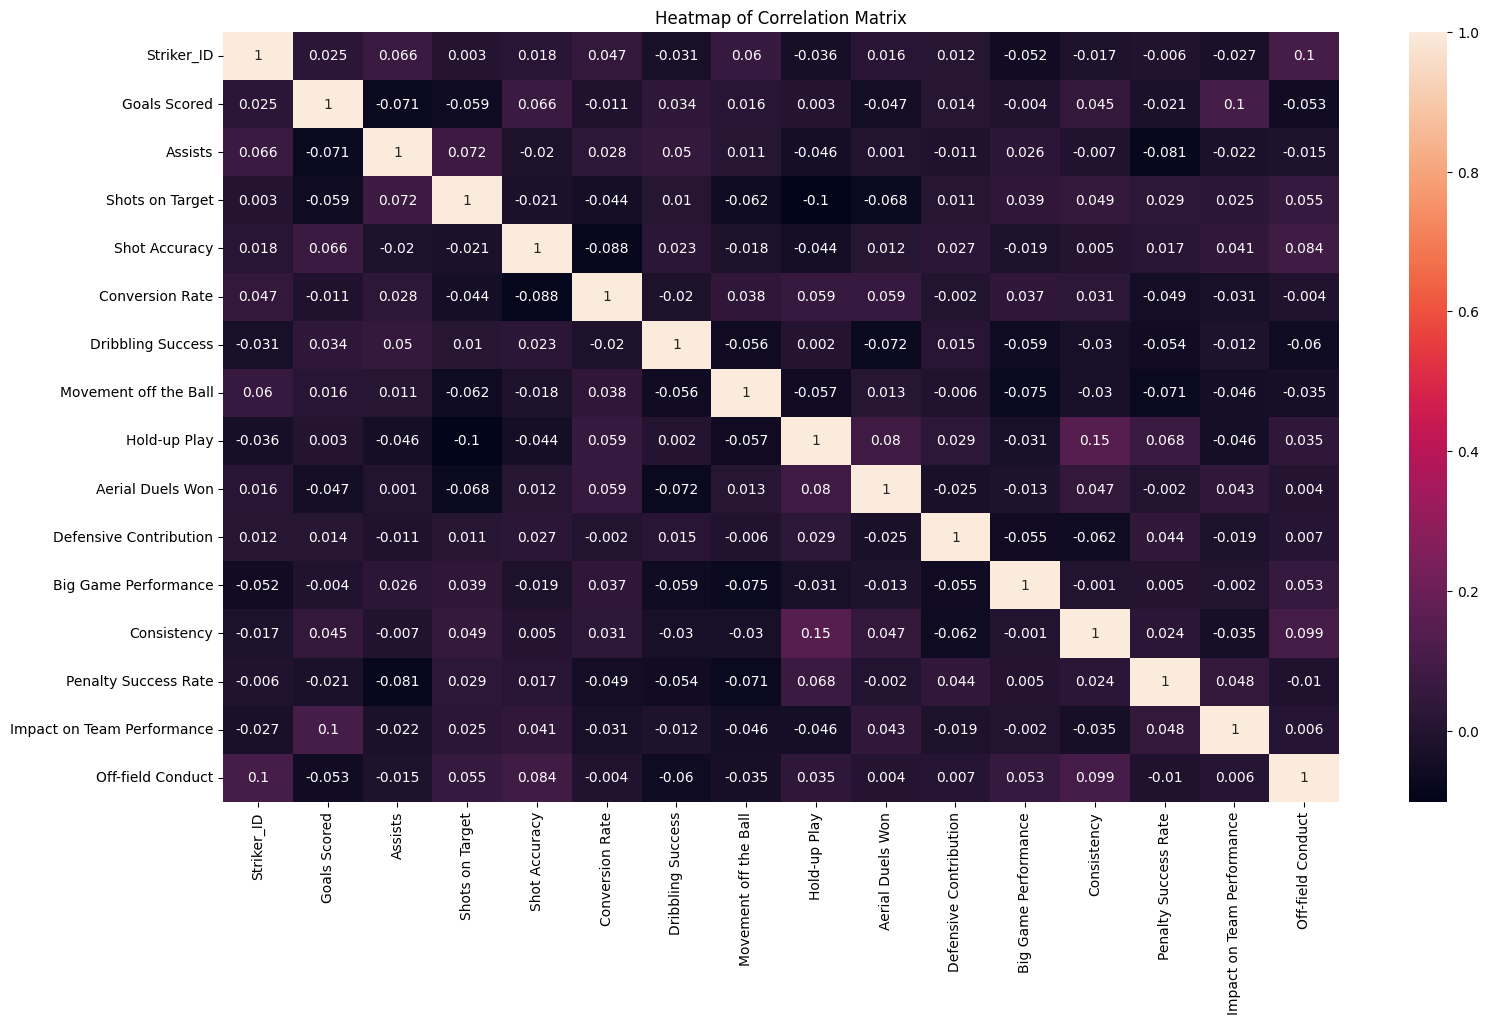

In [38]:
# Correlation matrix with a heatmap
num_variables = data.select_dtypes(include = ['number']).columns
correl_matrix = round(data[num_variables].corr(), 3)
correl_matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correl_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [39]:
# Statistical Test

# Normality test
stat, p_value = shapiro(data['Consistency'])
print('P value: ', round(p_value, 3))

P value:  0.451


In [40]:
# Filtering data
Spain = data.query('Nationality == "Spain"')['Consistency']
France = data.query('Nationality == "France"')['Consistency']
Germany = data.query('Nationality == "Germany"')['Consistency']
Brazil = data.query('Nationality == "Brazil"')['Consistency']
England = data.query('Nationality == "England"')['Consistency']
# Levene test for statistics
stats, p_value = levene(Spain, France, Germany, Brazil, England)
print("P value: ", round(p_value, 3))

P value:  0.808


In [41]:
# One way ANOVA
Test_stat, p_value = f_oneway(Spain, France, Germany, Brazil, England)
print("P value: ", round(p_value, 2))

P value:  0.19


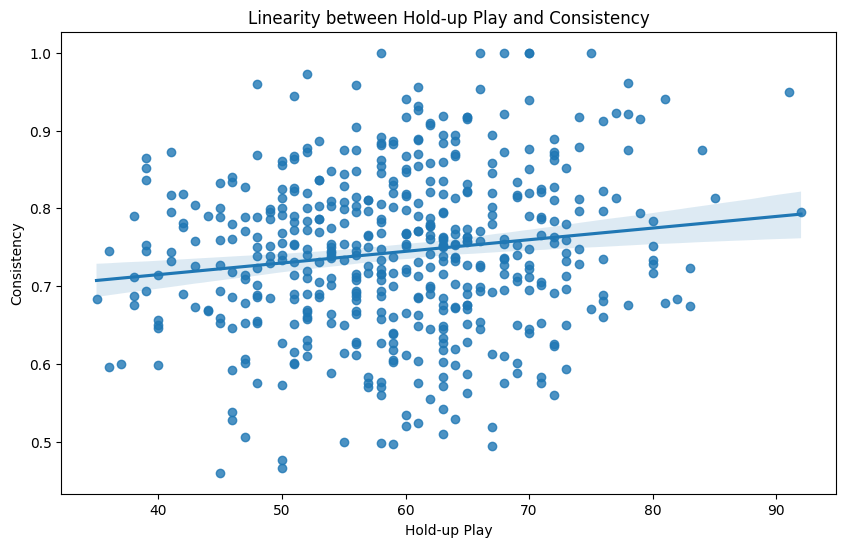

In [42]:
# Linearity test
plt.figure(figsize = (10, 6))
sns.regplot(x = 'Hold-up Play', y = 'Consistency', data = data)
plt.title('Linearity between Hold-up Play and Consistency')
plt.xlabel('Hold-up Play')
plt.ylabel('Consistency')
plt.show()

In [43]:
# Pearson correlation
play = data['Hold-up Play']
Consistency = data['Consistency']

corr, p_value = pearsonr(play, Consistency)
print("Correlation coefficient: ", round(corr, 3))
print("P value: ", round(p_value, 3))

Correlation coefficient:  0.147
P value:  0.001


In [44]:
x = data['Hold-up Play']
y = data['Consistency']

x_constant = sm.add_constant(x)
model = sm.OLS(y, x_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Wed, 13 Aug 2025   Prob (F-statistic):            0.00101
Time:                        07:32:52   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

In [45]:
# Feature Engineering
# New feature - Total contribution score
data['Total contribution score'] = (data['Goals Scored'] + data['Assists'] + data['Shots on Target'] + data['Dribbling Success'] + data['Aerial Duels Won'] + data['Defensive Contribution'] + data['Big Game Performance'] + data['Consistency'])
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [46]:
# LabelEncoding
encoder = LabelEncoder()
data['Footedness'] = encoder.fit_transform(data['Footedness'])
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [47]:
# Dummies for Nationality
dummies = pd.get_dummies(data['Nationality'])
processed_df = pd.concat([data, dummies], axis = 1)
processed_df = processed_df.drop('Nationality', axis = 1)
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.820314,0.922727,8,11,113.577376,False,False,False,False,True
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.803321,0.678984,3,8,110.600139,False,False,True,False,False
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.766540,0.843858,8,9,94.433410,False,False,False,True,False
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.611798,0.662997,6,8,124.250575,False,False,True,False,False
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.701638,0.906538,8,6,107.293123,False,False,True,False,False


In [48]:
# Cluster Analysis
# KMeans Clustering
# Selecting features
x = processed_df.drop('Striker_ID', axis = 1)

# Calculating WCSS score
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss_score = kmeans.inertia_
    wcss.append(wcss_score)

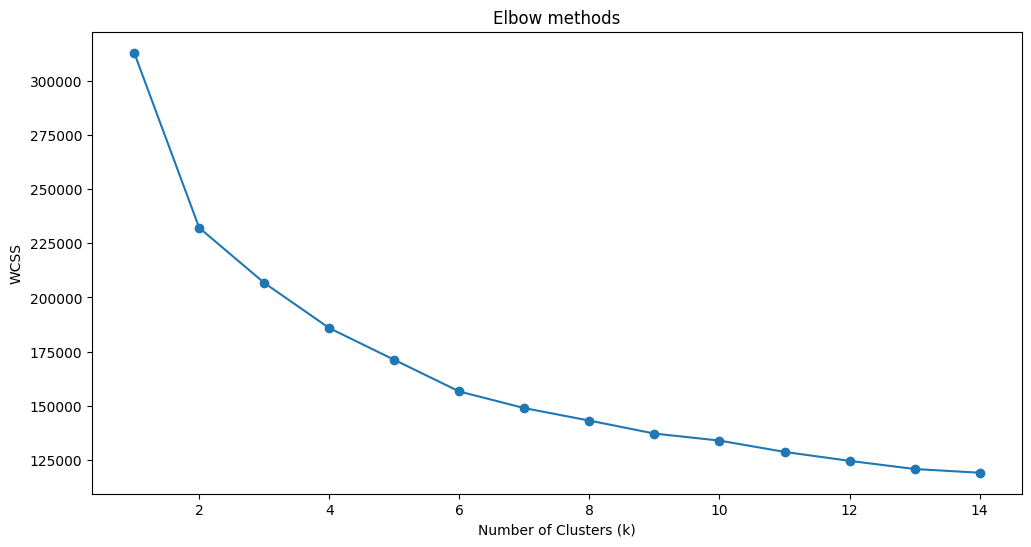

In [49]:
# Plotting elbow chart
plt.figure(figsize = (12, 6))
plt.plot(range(1, 15), wcss, marker = 'o')
plt.title('Elbow methods')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [50]:
# Building KMeans with k = 2
final_km = KMeans(n_clusters = 2)
final_km.fit(x)

# Generating labels
labels = final_km.labels_
labels

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [51]:
# Adding labels
processed_df['Clusters'] = labels
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain,Clusters
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,False,False,False,False,True,1
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,False,False,True,False,False,1
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,False,False,False,True,False,1
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,False,False,True,False,False,0
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,False,False,True,False,False,1


In [52]:
# Checking clusters
round(processed_df.groupby('Clusters')['Total contribution score'].mean(), 2)

,Total contribution score
Clusters,
0,123.35
1,101.85


In [53]:
# Assigning meaningfull names
mapping = {0:'Best strikers', 1:'Regular strikers'}
processed_df['Strikers types'] = processed_df['Clusters'].map(mapping)

In [54]:
# Deleting the Clusters variable
processed_df = processed_df.drop('Clusters', axis = 1)
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,False,False,False,False,True,Regular strikers
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,False,False,True,False,False,Regular strikers
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,False,False,False,True,False,Regular strikers
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,False,False,True,False,False,Best strikers
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,False,False,True,False,False,Regular strikers


In [55]:
# Data Preprocessing for ML
# New feature mapping
mapping = {'Best strikers':1, 'Regular strikers': 0}
processed_df['Strikers types'] = processed_df['Strikers types'].map(mapping)
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,False,False,False,False,True,0
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,False,False,True,False,False,0
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,False,False,False,True,False,0
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,False,False,True,False,False,1
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,False,False,True,False,False,0


In [58]:
# Selecting Features
x = processed_df.drop(['Striker_ID', 'Strikers types'], axis = 1)
y = processed_df['Strikers types']

In [59]:
# Scaling Features
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x

array([[-1.07047781, -1.03252879,  0.5050467 , ..., -0.47801802,
        -0.47169258,  1.86125917],
       [-1.07047781,  0.968496  , -0.10638998, ...,  2.09197134,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879,  0.70885893, ..., -0.47801802,
         2.12002488, -0.53727069],
       ...,
       [-1.07047781,  0.968496  , -0.10638998, ..., -0.47801802,
        -0.47169258, -0.53727069],
       [ 0.93416229,  0.968496  , -0.9216389 , ..., -0.47801802,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879, -1.32926335, ..., -0.47801802,
        -0.47169258, -0.53727069]])

In [60]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 42)

In [61]:
# Predictive Classification Analytics
# Logistic Regression Machine Learning Model to predict strikers type
# Model training
lgr_model = LogisticRegression()
lgr_model.fit(x_train, y_train)
#Prediction
y_lgr_pred = lgr_model.predict(x_test)
# Evaluation
accuracy_lgr = accuracy_score(y_test, y_lgr_pred)
print(accuracy_lgr*100,'%')

96.0 %


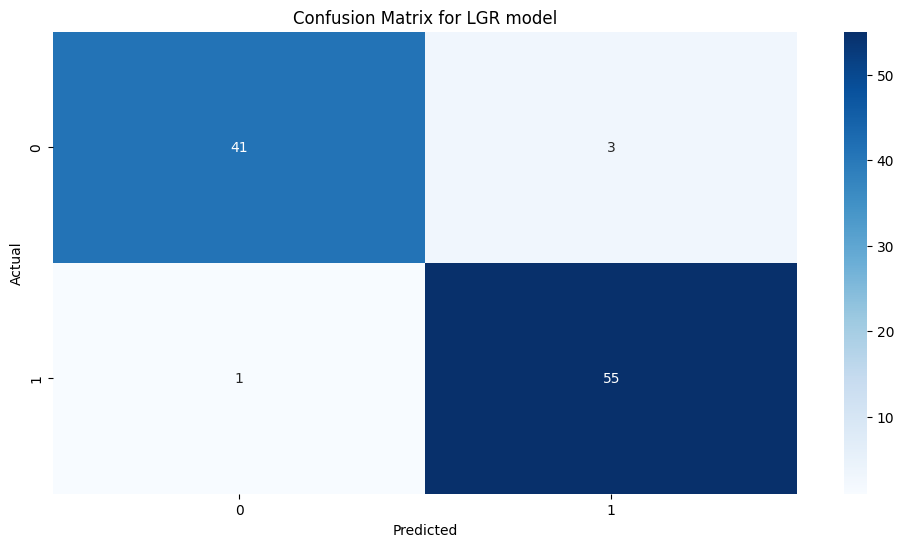

In [62]:
# Creating confusion matrix
conf_matrix_lgr = confusion_matrix(y_test, y_lgr_pred)

# Plotting confusion matrix
plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_lgr, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for LGR model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()